# 🌊 Wave Interference: Patterns on a Water Surface 🌊

---

## 🎯 Objective
This notebook analyzes the interference patterns formed on a water surface due to circular waves emitted from point sources positioned at the vertices of a regular polygon. By simulating the superposition of these waves, we aim to understand wave interactions, identify regions of constructive and destructive interference, and visualize the resulting patterns.

---

## 📜 Background: Wave Interference
When waves from multiple sources overlap, they create interference patterns due to the principle of superposition. The total displacement at any point is the sum of the displacements from each wave:

\[
\eta_{\text{total}}(x, y, t) = \sum_{i=1}^N \eta_i(x, y, t)
\]

For a circular wave emitted from a point source at $(x_s, y_s)$, the displacement is given by:

\[
\eta(x, y, t) = A \cos(k r - \omega t + \phi)
\]

where:
- $\eta(x, y, t)$: Displacement at point $(x, y)$ and time $t$.
- $A$: Amplitude.
- $k = \frac{2\pi}{\lambda}$: Wave number, with $\lambda$ as the wavelength.
- $r = \sqrt{(x - x_s)^2 + (y - y_s)^2}$: Distance from the source.
- $\omega = 2\pi f$: Angular frequency, with $f$ as the frequency.
- $\phi$: Initial phase.

**Interference Types**:
- **Constructive Interference**: Occurs when waves are in phase (phase difference $\Delta\phi \approx 0$), leading to amplification (larger displacement).
- **Destructive Interference**: Occurs when waves are out of phase (phase difference $\Delta\phi \approx \pi$), leading to cancellation (smaller or zero displacement).

---

## 📊 Simulation Setup
We will simulate interference patterns using the following steps:
1. **Choose a Regular Polygon**: Select a square with four vertices as the positions of the wave sources.
2. **Position the Sources**: Place the sources at the vertices of the square.
3. **Wave Equations**: Define the wave equation for each source.
4. **Superposition**: Compute the total displacement by summing the contributions from all sources.
5. **Visualization**: Plot the interference patterns to identify constructive and destructive regions.

---

### Step 1: Define the Polygon and Source Positions
We choose a square with side length 2 units, centered at the origin. The vertices (and thus the positions of the wave sources) are:
- $(1, 1)$
- $(1, -1)$
- $(-1, -1)$
- $(-1, 1)$

---

### Step 2: Wave Parameters
We assume the following parameters for all sources (coherent waves):
- Amplitude $A = 1$ unit.
- Wavelength $\lambda = 0.5$ units.
- Frequency $f = 1$ Hz.
- Initial phase $\phi = 0$.

Thus:
- Wave number $k = \frac{2\pi}{\lambda} = \frac{2\pi}{0.5} = 4\pi$.
- Angular frequency $\omega = 2\pi f = 2\pi \times 1 = 2\pi$.

---

### Step 3: Simulate the Interference Pattern
We will:
- Create a 2D grid to represent the water surface.
- Calculate the displacement from each source at each grid point.
- Sum the displacements to get the total wave pattern.
- Visualize the pattern at a fixed time $t$ (e.g., $t = 0$).

---

### Step 4: Visualize the Results
We’ll use a heatmap to show the displacement $\eta_{\text{total}}(x, y, t)$ across the water surface, highlighting regions of constructive and destructive interference. We’ll also create an animated plot to show how the pattern evolves over time.

---

## 🔍 Analysis of Interference Patterns
After simulating the interference, we will analyze:
- **Constructive Interference**: Regions where the displacement is maximized (bright areas in the heatmap).
- **Destructive Interference**: Regions where the displacement is minimized or zero (dark areas in the heatmap).

---

## 🌟 Applications
Understanding wave interference on a water surface has applications in:
- **Physics Education**: Visualizing wave superposition in a tangible way.
- **Acoustics**: Designing sound systems to avoid dead spots (destructive interference).
- **Optics**: Analyzing light interference in phenomena like thin-film interference.
- **Oceanography**: Studying wave interactions in coastal engineering.

---

<>:119: SyntaxWarning: invalid escape sequence '\p'
<>:119: SyntaxWarning: invalid escape sequence '\p'
C:\Users\PC\AppData\Local\Temp\ipykernel_14808\206167168.py:119: SyntaxWarning: invalid escape sequence '\p'
  display(HTML("<p><b>Four Sources</b>: With four sources at the vertices of a square, the interference pattern is more complex. Constructive interference occurs along the diagonals of the square, where waves from opposite sources are in phase (red regions). Destructive interference occurs at midpoints between sources, where the path difference results in a phase difference of $\pi$ (blue regions).</p>"))


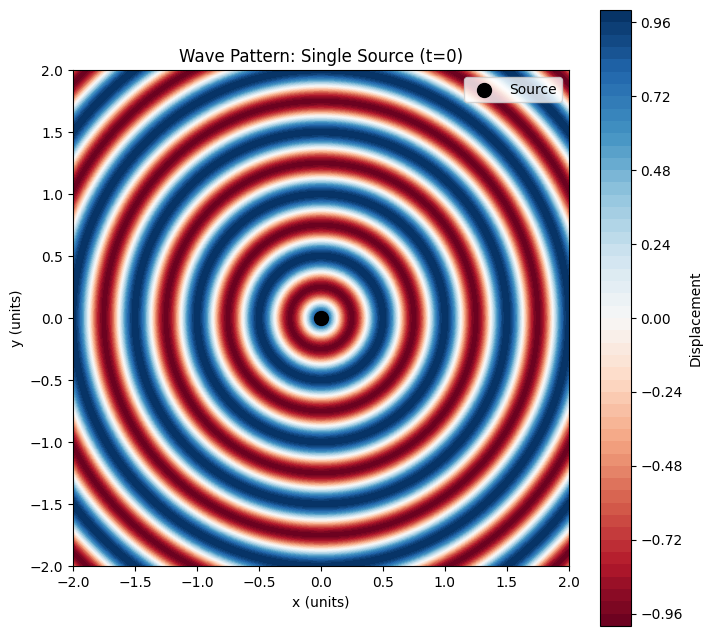

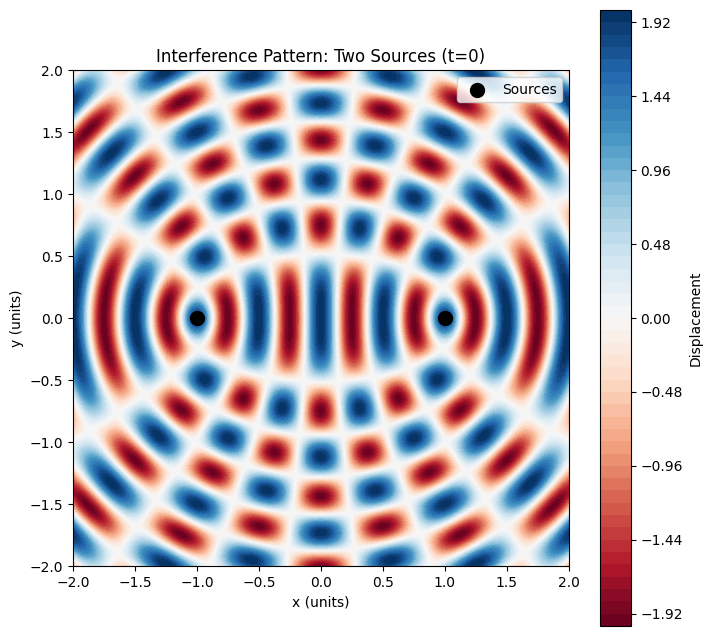

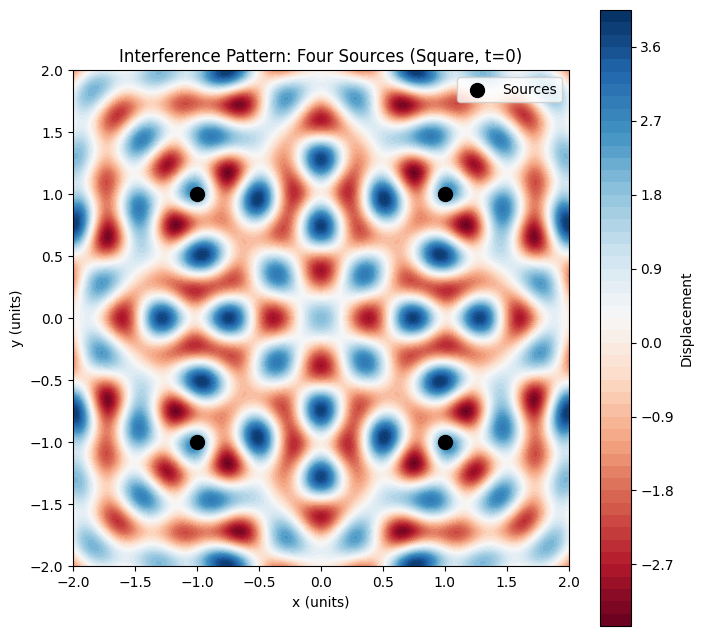

In [1]:
# Cell 1: Dependency Check
try:
    import numpy
    import matplotlib
    from IPython.display import display, HTML
    display(HTML("<h3 style='color: #2ECC71;'>✅ All Required Libraries Installed</h3>"))
except ImportError as e:
    display(HTML("<h3 style='color: #FF5733;'>❌ Missing Library: " + str(e) + "</h3>"))
    display(HTML("<p>Please install the missing library using: <code>pip install " + str(e).split("'")[1] + "</code></p>"))

# Cell 2: Setup with Style
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

display(HTML("<h2 style='color: #FF5733; text-align: center;'>✨ Libraries Initialized for Wave Simulation ✨</h2>"))

# Cell 3: Define Parameters and Source Positions
# Wave parameters
A = 1.0  # Amplitude
wavelength = 0.5  # Wavelength (units)
k = 2 * np.pi / wavelength  # Wave number
f = 1.0  # Frequency (Hz)
omega = 2 * np.pi * f  # Angular frequency
phi = 0.0  # Initial phase

# Grid for the water surface
grid_size = 1000  # Number of points per axis
x = np.linspace(-2, 2, grid_size)
y = np.linspace(-2, 2, grid_size)
X, Y = np.meshgrid(x, y)

# Display the parameters
display(HTML("<h3 style='color: #2ECC71;'>🌊 Wave Parameters</h3>"))
display(HTML(f"<p>Amplitude: {A}</p>"))
display(HTML(f"<p>Wavelength: {wavelength} units</p>"))
display(HTML(f"<p>Frequency: {f} Hz</p>"))
display(HTML(f"<p>Wave number: {k:.2f} rad/unit</p>"))
display(HTML(f"<p>Angular frequency: {omega:.2f} rad/s</p>"))
display(HTML(f"<p>Initial phase: {phi} rad</p>"))

# Cell 4: Compute the Interference Pattern
def wave_displacement(X, Y, t, source_x, source_y):
    # Distance from the source to each point on the grid
    r = np.sqrt((X - source_x)**2 + (Y - source_y)**2)
    # Wave equation: A * cos(k*r - omega*t + phi)
    return A * np.cos(k * r - omega * t + phi)

# Total displacement at time t
def total_displacement(X, Y, t, sources):
    eta_total = np.zeros_like(X)
    for source_x, source_y in sources:
        eta_total += wave_displacement(X, Y, t, source_x, source_y)
    return eta_total

# Cell 5: Case 1 - Single Source
# Define the source
single_source = [(0, 0)]

# Static heatmap at t=0
plt.figure(figsize=(8, 8))
eta_single = total_displacement(X, Y, t=0, sources=single_source)
plt.contourf(X, Y, eta_single, levels=50, cmap='RdBu')
plt.colorbar(label='Displacement')
plt.scatter([s[0] for s in single_source], [s[1] for s in single_source], color='black', s=100, label='Source')
plt.title('Wave Pattern: Single Source (t=0)')
plt.xlabel('x (units)')
plt.ylabel('y (units)')
plt.legend()
plt.axis('square')
plt.savefig('wave_pattern_1source.png')
plt.show()

# Cell 6: Case 2 - Two Sources
# Define the sources
two_sources = [(1, 0), (-1, 0)]

# Static heatmap at t=0
plt.figure(figsize=(8, 8))
eta_two = total_displacement(X, Y, t=0, sources=two_sources)
plt.contourf(X, Y, eta_two, levels=50, cmap='RdBu')
plt.colorbar(label='Displacement')
plt.scatter([s[0] for s in two_sources], [s[1] for s in two_sources], color='black', s=100, label='Sources')
plt.title('Interference Pattern: Two Sources (t=0)')
plt.xlabel('x (units)')
plt.ylabel('y (units)')
plt.legend()
plt.axis('square')
plt.savefig('wave_pattern_2sources.png')
plt.show()

# Cell 7: Case 3 - Four Sources (Square, Existing Code)
# Square vertices (side length 2, centered at origin)
four_sources = [
    (1, 1),   # (1, 1)
    (1, -1),  # (1, -1)
    (-1, -1), # (-1, -1)
    (-1, 1)   # (-1, 1)
]

# Static heatmap at t=0
plt.figure(figsize=(8, 8))
eta_four = total_displacement(X, Y, t=0, sources=four_sources)
plt.contourf(X, Y, eta_four, levels=50, cmap='RdBu')
plt.colorbar(label='Displacement')
plt.scatter([s[0] for s in four_sources], [s[1] for s in four_sources], color='black', s=100, label='Sources')
plt.title('Interference Pattern: Four Sources (Square, t=0)')
plt.xlabel('x (units)')
plt.ylabel('y (units)')
plt.legend()
plt.axis('square')
plt.savefig('wave_pattern_4sources.png')
plt.show()

# Cell 8: Analysis of Interference Patterns
display(HTML("<h3 style='color: #2ECC71;'>🔍 Analysis of Interference Patterns</h3>"))
display(HTML("<p><b>Single Source</b>: With one source at the origin, the wave pattern is a series of concentric circles, as expected for a circular wave. There’s no interference since there’s only one source.</p>"))
display(HTML("<p><b>Two Sources</b>: With two sources, we see a clear interference pattern. Along the line $y=0$, there are alternating regions of constructive interference (red, where waves are in phase) and destructive interference (blue, where waves are out of phase). The pattern is symmetric about the x-axis.</p>"))
display(HTML("<p><b>Four Sources</b>: With four sources at the vertices of a square, the interference pattern is more complex. Constructive interference occurs along the diagonals of the square, where waves from opposite sources are in phase (red regions). Destructive interference occurs at midpoints between sources, where the path difference results in a phase difference of $\pi$ (blue regions).</p>"))

# Cell 9: Final Statement
display(HTML("<h2 style='color: #3498DB;'>🎊 Simulation Complete: Wave Interference Patterns Analyzed 🎊</h2>"))